Matplotlib has proven to be an incredibly useful and popular visualization tool, but even avid users will admit it often leaves much to be desired. There are several valid complaints about Matplotlib that often come up:

* Matplotlib's API is relatively low level. Doing sophisticated statistical visualization is possible, but often requires a lot of boilerplate code.
* Matplotlib predated Pandas by more than a decade, and thus is not designed for use with Pandas DataFrames. In order to visualize data from a Pandas DataFrame, you must extract each Series and often concatenate them together into the right format. It would be nicer to have a plotting library that can intelligently use the DataFrame labels in a plot.

An answer to these problems is **Seaborn**. Seaborn provides an API on top of Matplotlib that offers sane choices for plot style and color defaults, defines simple high-level functions for common statistical plot types, and integrates with the functionality provided by Pandas DataFrames

# Seaborn

Seaborn is a library for making statistical graphics in Python. It builds on top of `matplotlib` and integrates closely with `pandas` data structures.

https://seaborn.pydata.org/tutorial/introduction.html

## Installation 

You'll need to install seaborn first with:

    !pip install seaborn

In [3]:
!pip install seaborn --user

  Using cached seaborn-0.12.1-py3-none-any.whl (288 kB)
  Using cached matplotlib-3.6.0-cp310-cp310-win_amd64.whl (7.2 MB)



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# Distribution Plots

Let's discuss some plots that allow us to visualize the distribution of a data set. These plots are:

* histplot
* jointplot
* pairplot
* rugplot
* kdeplot

___
## Imports

In [5]:
import seaborn as sns
%matplotlib inline

## Data
Seaborn comes with built-in data sets!

In [8]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [9]:
penguins.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

<AxesSubplot: xlabel='species', ylabel='body_mass_g'>

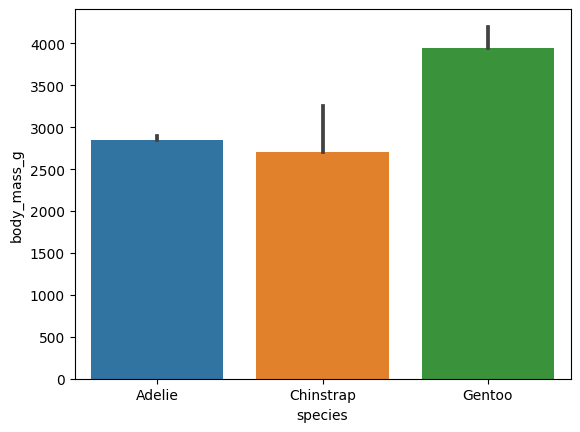

In [13]:
sns.barplot(data=penguins, x="species", y="body_mass_g", estimator="min")

<AxesSubplot: xlabel='species', ylabel='body_mass_g'>

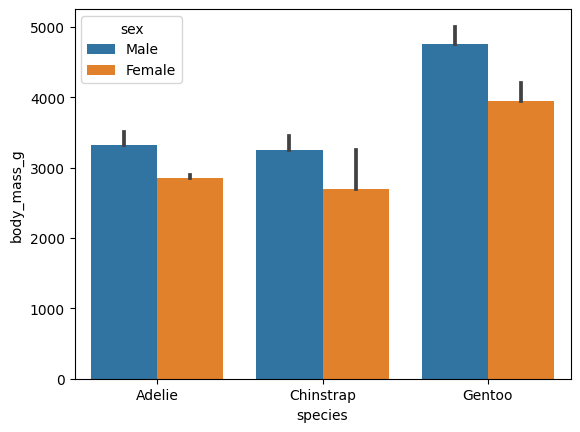

In [14]:
sns.barplot(data=penguins, 
                x="species", y="body_mass_g", 
                estimator="min",
                hue="sex")

In [15]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## histplot

https://seaborn.pydata.org/generated/seaborn.histplot.html

The histplot shows the distribution of a univariate or bivariate set of observations.

<AxesSubplot: xlabel='total_bill', ylabel='Count'>

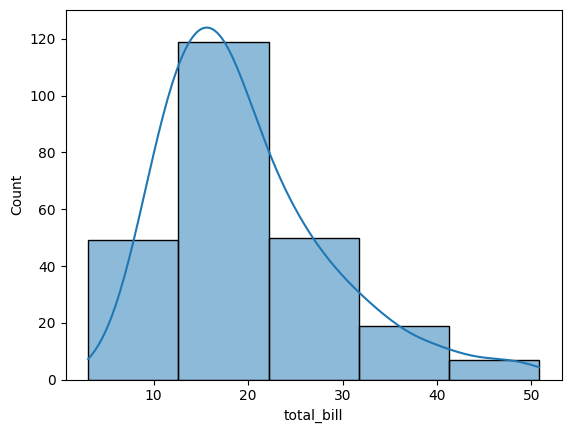

In [42]:
sns.histplot(tips['total_bill'], kde=True, bins=5)

<AxesSubplot: xlabel='body_mass_g', ylabel='Count'>

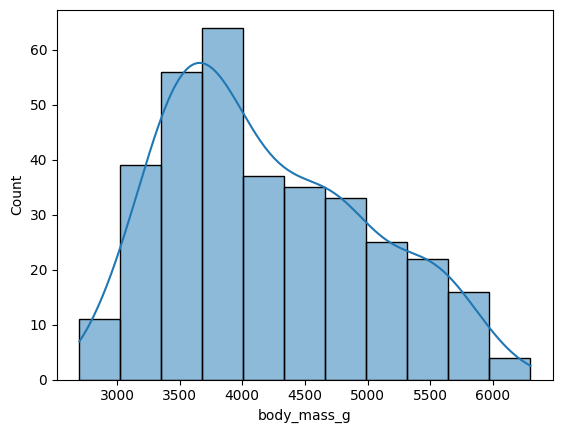

In [18]:
sns.histplot(penguins['body_mass_g'], kde=True)

<AxesSubplot: ylabel='Count'>

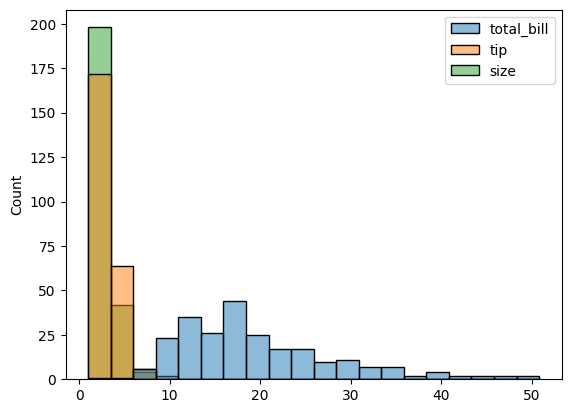

In [19]:
sns.histplot(tips)

To remove the kde layer and just have the histogram use:

## jointplot

https://seaborn.pydata.org/generated/seaborn.jointplot.html

jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with: 
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

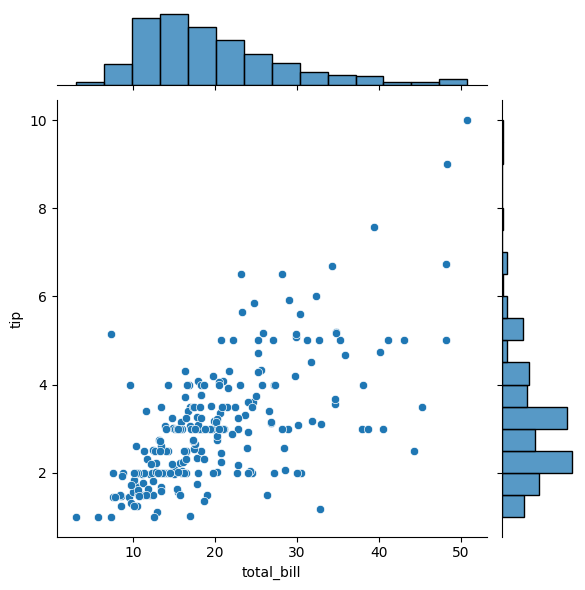

In [20]:
sns.jointplot(data=tips, x="total_bill", y="tip", kind="scatter")

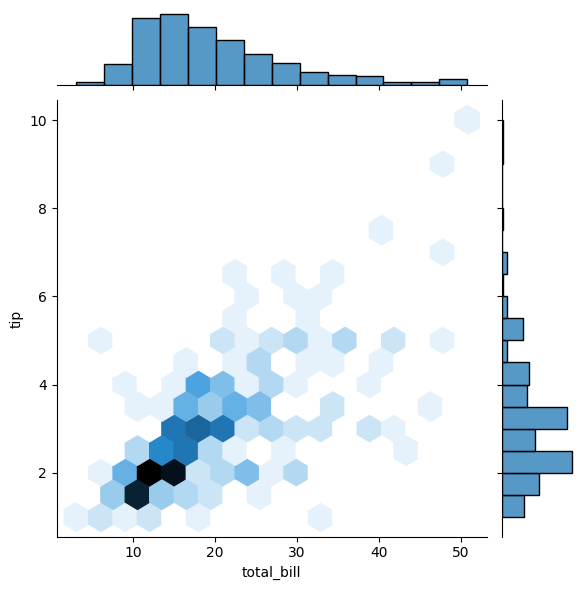

In [21]:
sns.jointplot(data=tips, x="total_bill", y="tip", kind="hex")

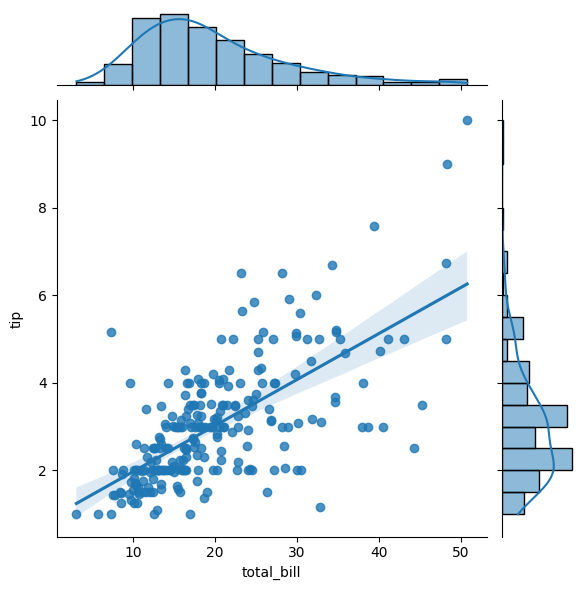

In [22]:
sns.jointplot(data=tips, x="total_bill", y="tip", kind="reg")

## pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

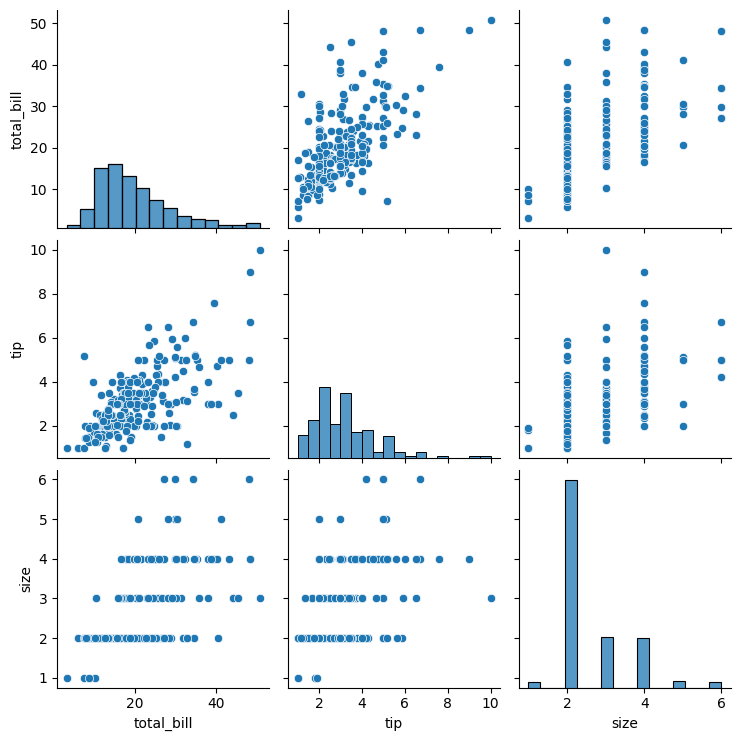

In [23]:
sns.pairplot(tips)

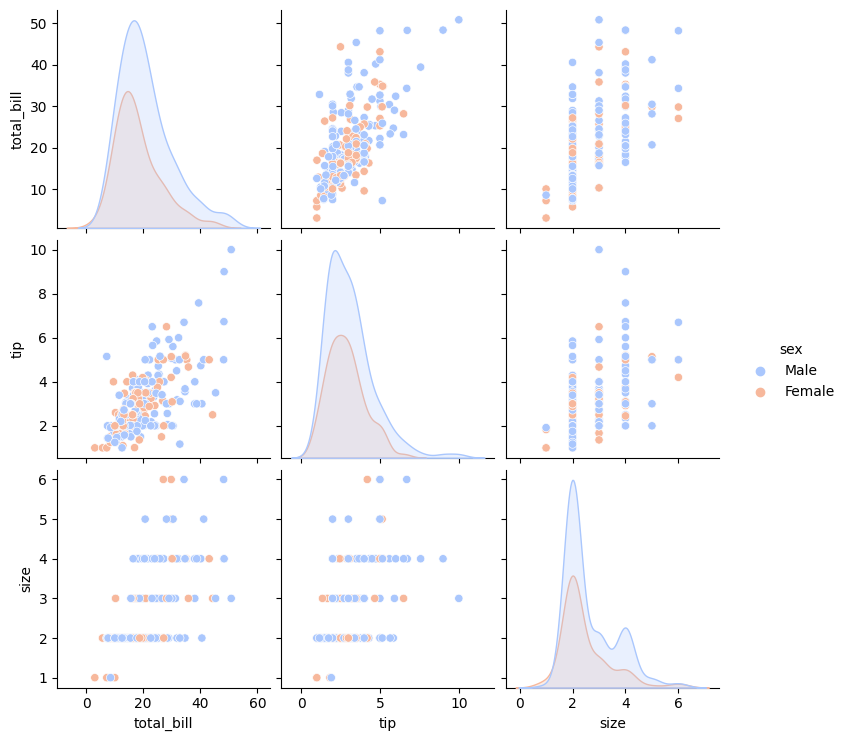

In [26]:
sns.pairplot(tips, hue="sex", palette="coolwarm")

## rugplot

https://seaborn.pydata.org/generated/seaborn.rugplot.html

rugplots are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:

<AxesSubplot: xlabel='total_bill'>

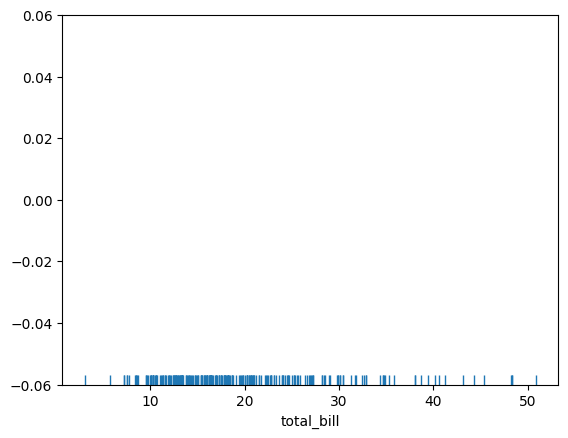

In [27]:
sns.rugplot(tips['total_bill'])

## kdeplot

https://seaborn.pydata.org/generated/seaborn.kdeplot.html

kdeplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. For example:

(0, 1)

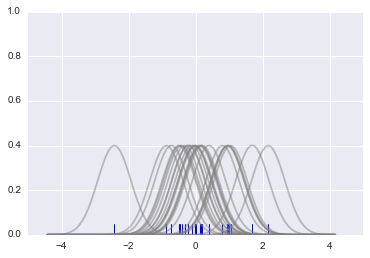

In [35]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

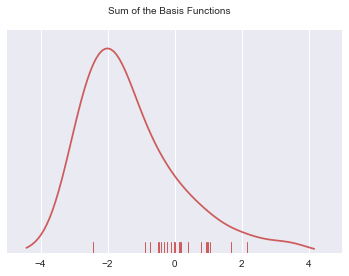

In [37]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

So with our tips dataset:

<AxesSubplot: xlabel='total_bill', ylabel='Density'>

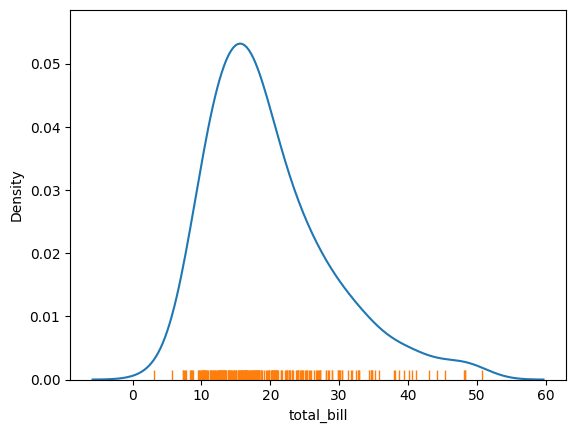

In [29]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


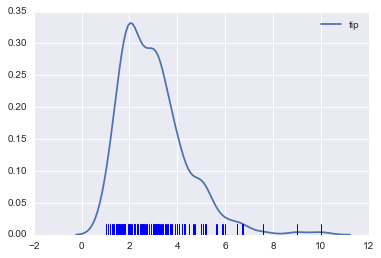

## displot

https://seaborn.pydata.org/generated/seaborn.displot.html

displot is the most general form of a categorical plot. It can take in a **kind** parameter to adjust the plot type:

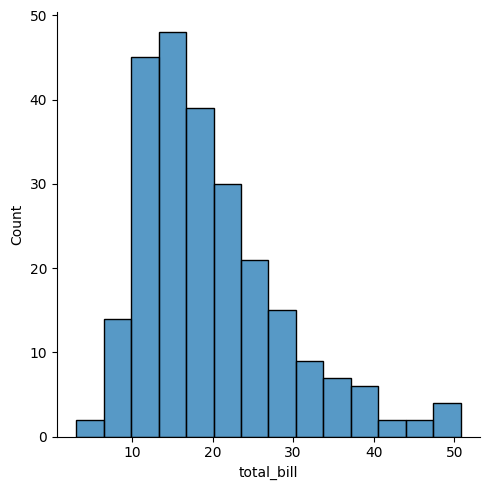

In [30]:
sns.displot(tips['total_bill']) #histplot

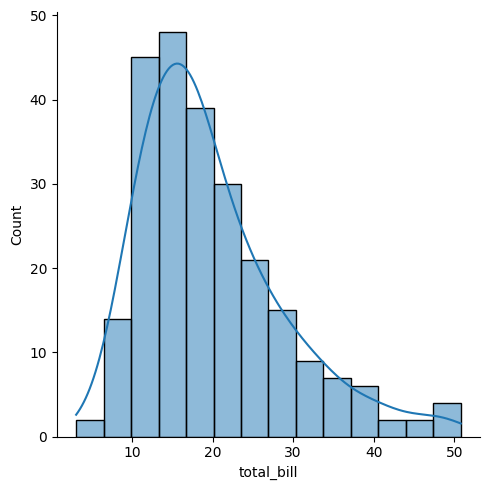

In [39]:
sns.displot(tips['total_bill'], kde=True) #histplot + kdeplot

<AxesSubplot: xlabel='total_bill', ylabel='Count'>

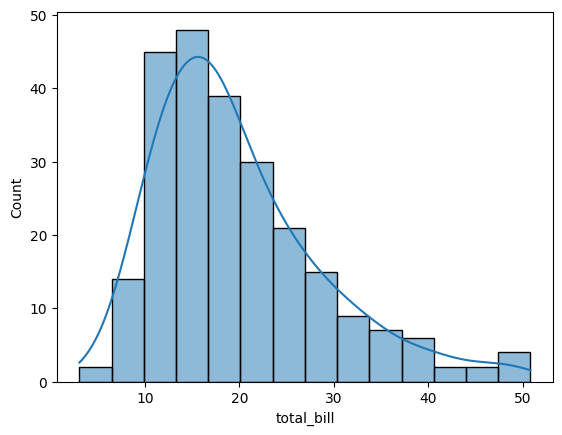

In [37]:
sns.histplot(tips['total_bill'], kde=True)